Problem 1 (50 points)

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
 + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$
Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$
where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane system is given below.

$a_1$	$a_2$	$a_3$
Water	8.07131	1730.63	233.426
1,4 dioxane	7.43155	1554.679	240.337
The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

$x_1$	0.0	0.1	0.2	0.3	0.4	0.5	0.6	0.7	0.8	0.9	1.0
$p$	28.1	34.4	36.7	36.9	36.8	36.7	36.5	35.4	32.9	27.7	17.5
Estimate $A_{12}$ and $A_{21}$ using data from the above table:

Formulate the least square problem;
Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1;
Compare your optimized model with the data. Does your model fit well with the data?

Problem 1 - Part 1 (Formulation of Problem)

The least square problem can be fomulated as:

\begin{aligned}
\min_{A_{12}, A{21}} \text{loss}  = \sum \left(\hat{p}-p\right)^{2}
\end{aligned}

Here ^p is the given function in the question

In [1]:
#PROBLEM 1

import numpy as np
import torch as t
from torch.autograd import Variable

# Define a variable, make sure requires_grad=True so that PyTorch can take gradient with respect to this variable
A = Variable(t.tensor([2.0, 1.0]), requires_grad=True) #assuming initial values for A12 and A21 as 2 & 1.

#Value derived from given formulation for P and corresponding a values
p_Sat_Water = 17.4733
p_Sat_Dio = 28.8241

pData = t.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]) # Given P values
x1 = t.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) # Given corresponding X1 values
x2 = 1-x1 #Given relation between X1 and X2

# Fix the step size
a = 0.001

# Start gradient descent
for i in range(1000):  # TODO: change the termination criterion
    
    ObjFun = lambda A, x1, x2, p_Sat_Dio, p_Sat_Water: x1*t.exp(A[0]*(((A[1]*x2)/(A[0]*x1+A[1]*x2))**2))*p_Sat_Water + x2*t.exp(A[1]*(((A[0]*x1)/(A[0]*x1+A[1]*x2))**2))*p_Sat_Dio
    
    loss = t.sum((ObjFun(A,x1,x2,p_Sat_Dio,p_Sat_Water)-pData)**2) #Final Objective function for loss which is to be minimized
    loss.backward() #To take gradient
    
    # no_grad() specifies that the operations within this context are not part of the computational graph, i.e., we don't need the gradient descent algorithm itself to be differentiable with respect to x
    with t.no_grad():
        A -= a * A.grad
        
        # need to clear the gradient at every step, or otherwise it will accumulate...
        A.grad.zero_()

print('Values of both A =\t',A.data.numpy())
print('\n')
print('Loss =\t', loss.data.numpy())
print('\n')

A_final = ([1.9584166, 1.6891807])
final = ObjFun(A_final, x1, x2, p_Sat_Dio, p_Sat_Water)

print('Values of P computed using gradient descent')
print(final)
print('\n')
print('Original Values of P using experimental data')
print(pData)

C:\Users\rohit\anaconda3\lib\site-packages\torch\autograd\__init__.py:147: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(


Values of both A =	 [1.9584166 1.6891807]


Loss =	 0.67019147


Values of P computed using gradient descent
tensor([28.8241, 34.6443, 36.4530, 36.8673, 36.8740, 36.7498, 36.3904, 35.3848,
        32.9478, 27.7300, 17.4733])


Original Values of P using experimental data
tensor([28.1000, 34.4000, 36.7000, 36.9000, 36.8000, 36.7000, 36.5000, 35.4000,
        32.9000, 27.7000, 17.5000])


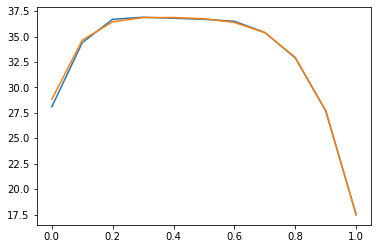

In [2]:
import matplotlib.pyplot as plt
plt.plot(x1, pData)
plt.plot(x1, final)

As we can see from the graph, both the data's are very simmilar with a low loss values overall.

_______________________________________________________________________________________________________________________________
Problem 2 (50 points)

Solve the following problem using Bayesian Optimization:$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found here.

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _chec

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

Graph shows that we converge, therefore, we can take the last values
[[ 2.54048681 -0.85039309]
 [-2.21946029 -0.56750409]
 [ 2.05864145 -1.89668899]
 ...
 [ 0.63895194 -1.86560815]
 [ 1.32313958  1.07424615]
 [-0.1216595  -1.90569104]]
[24.99440714  8.97664428 38.07873612 ... 34.64704015  4.48727401
 38.5197265 ]


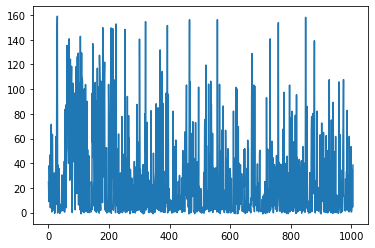

In [32]:
#PROBLEM 2
#Reffering to thuijskens/bayesian-optimization code as sample for optimization

""" gp.py
Bayesian optimisation of loss functions.
"""

import numpy as np
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize

def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    """ expected_improvement
    Expected improvement acquisition function.
    Arguments:
    ----------
        x: array-like, shape = [n_samples, n_hyperparams]
            The point for which the expected improvement needs to be computed.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: Numpy array.
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        n_params: int.
            Dimension of the hyperparameter space.
    """

    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    """ sample_next_hyperparameter
    Proposes the next hyperparameter to sample the loss function for.
    Arguments:
    ----------
        acquisition_func: function.
            Acquisition function to optimise.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: array-like, shape = [n_obs,]
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        bounds: Tuple.
            Bounds for the L-BFGS optimiser.
        n_restarts: integer.
            Number of times to run the minimiser with different starting points.
    """
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x


def bayesian_optimisation(n_iters, sample_loss, bounds, x0=None, n_pre_samples=5,
                          gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7):
    """ bayesian_optimisation
    Uses Gaussian Processes to optimise the loss function `sample_loss`.
    Arguments:
    ----------
        n_iters: integer.
            Number of iterations to run the search algorithm.
        sample_loss: function.
            Function to be optimised.
        bounds: array-like, shape = [n_params, 2].
            Lower and upper bounds on the parameters of the function `sample_loss`.
        x0: array-like, shape = [n_pre_samples, n_params].
            Array of initial points to sample the loss function for. If None, randomly
            samples from the loss function.
        n_pre_samples: integer.
            If x0 is None, samples `n_pre_samples` initial points from the loss function.
        gp_params: dictionary.
            Dictionary of parameters to pass on to the underlying Gaussian Process.
        random_search: integer.
            Flag that indicates whether to perform random search or L-BFGS-B optimisation
            over the acquisition function.
        alpha: double.
            Variance of the error term of the GP.
        epsilon: double.
            Precision tolerance for floats.
    """

    x_list = []
    y_list = []

    n_params = bounds.shape[0]

    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)
            y_list.append(sample_loss(params))
    else:
        for params in x0:
            x_list.append(params)
            y_list.append(sample_loss(params))

    xp = np.array(x_list)
    yp = np.array(y_list)

    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=alpha,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

    for n in range(n_iters):

        model.fit(xp, yp)

        # Sample next hyperparameter
        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, bounds=bounds, n_restarts=100)

        # Duplicates will break the GP. In case of a duplicate, we will randomly sample a next query point.
        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])

        # Sample loss for new set of parameters
        cv_score = sample_loss(next_sample)

        # Update lists
        x_list.append(next_sample)
        y_list.append(cv_score)

        # Update xp and yp
        xp = np.array(x_list)
        yp = np.array(y_list)

    return xp, yp

n = 1000
nPreSamples = 5

Eqn = lambda x: (4-2.1*x[0]**2+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(-4+4*(x[1]**2))*(x[1]**2)
bounds = np.array([[-3, 3],[-2,2]])
bOp1, bOp2 = bayesian_optimisation(n, Eqn, bounds, x0=None, n_pre_samples=5, gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7)

plt.plot(np.linspace(1,(n+nPreSamples),(n+nPreSamples)),bOp2)
plt.show

print("Graph shows that we converge, therefore, we can take the last values")

print(bOp1)
print(bOp2)

In [43]:
print('Value of X1 and X2=\t', bOp1[1000])

Value of X1 and X2=	 [-0.27369204 -1.15259747]


In [45]:
print('value of minimized function=\t', bOp2[1000])

value of minimized function=	 2.348965430567387
